[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4840
[LightGBM] [Info] Number of data points in the train set: 342100, number of used features: 24
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:32:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4842
[LightGBM] [Info] Number of data points in the train set: 228066, number of used features: 24
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4832
[LightGBM] [Info] Number of data points in the train set: 228067, number of used features: 24
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from scor

C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:41:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:42:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔥 Stacked Model Accuracy: 0.9118

 Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     17105
           1       0.86      0.88      0.87     17105
           2       0.91      0.88      0.89     17105
           3       0.96      0.92      0.94     17155
           4       0.94      0.96      0.95     17055

    accuracy                           0.91     85525
   macro avg       0.91      0.91      0.91     85525
weighted avg       0.91      0.91      0.91     85525



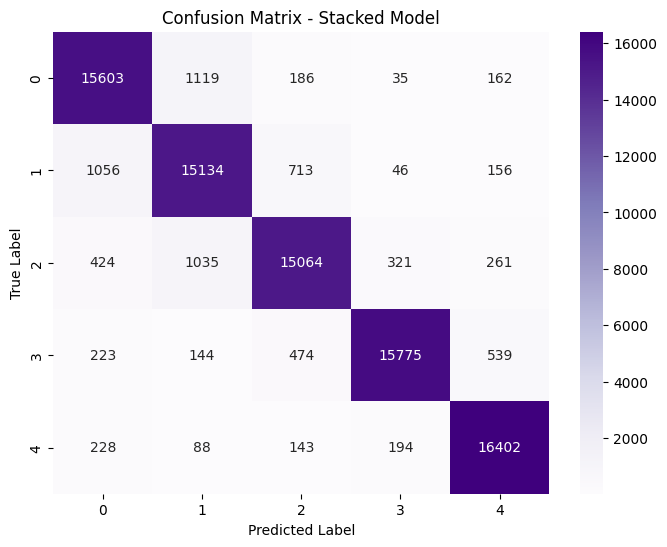

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset.csv")

# Drop rows with NaN in the target column (last column)
df = df.dropna(subset=[df.columns[-1]])

# Features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Quantile-based binning for class balancing
num_bins = 5
y = pd.qcut(y, q=num_bins, labels=range(num_bins), duplicates='drop')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Clean column names
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# Base models with imbalance handling via boosting and class_weight
base_models = [
    ("lightgbm", lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, class_weight='balanced', random_state=42)),
    ("random_forest", RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
    ("xgboost", XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False,
                              eval_metric='mlogloss', scale_pos_weight=1, random_state=42))
]

# Meta model
meta_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)

# Stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)

# Train model
stacked_model.fit(X_train, y_train)

# Predictions
stacked_pred = stacked_model.predict(X_test)

# Evaluation
stacked_acc = accuracy_score(y_test, stacked_pred)
print(f"🔥 Stacked Model Accuracy: {stacked_acc:.4f}")
print("\n Classification Report:\n")
print(classification_report(y_test, stacked_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix - Stacked Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


1. Plot Feature Importance for Base Models

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4840
[LightGBM] [Info] Number of data points in the train set: 342100, number of used features: 24
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


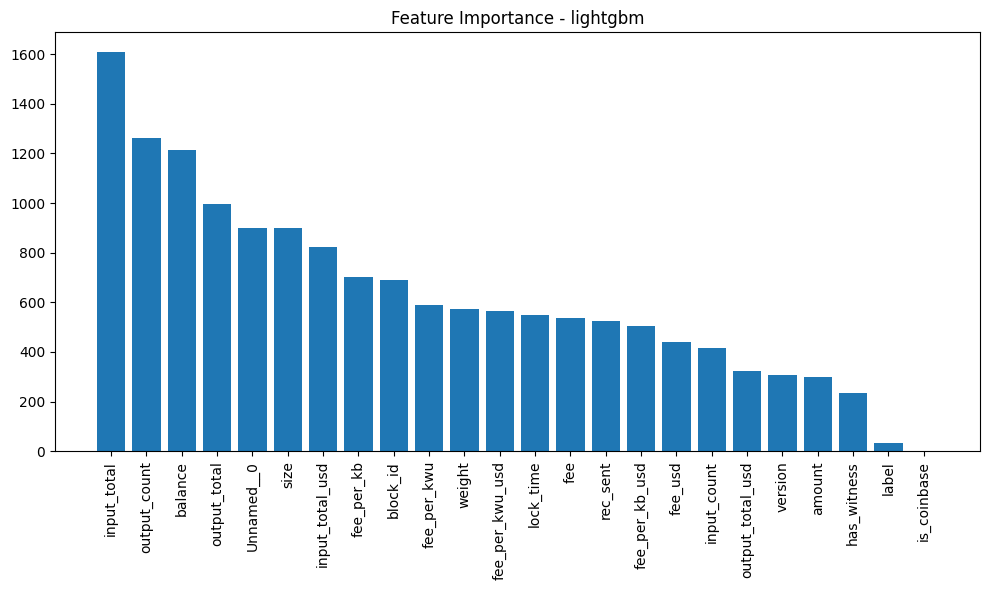

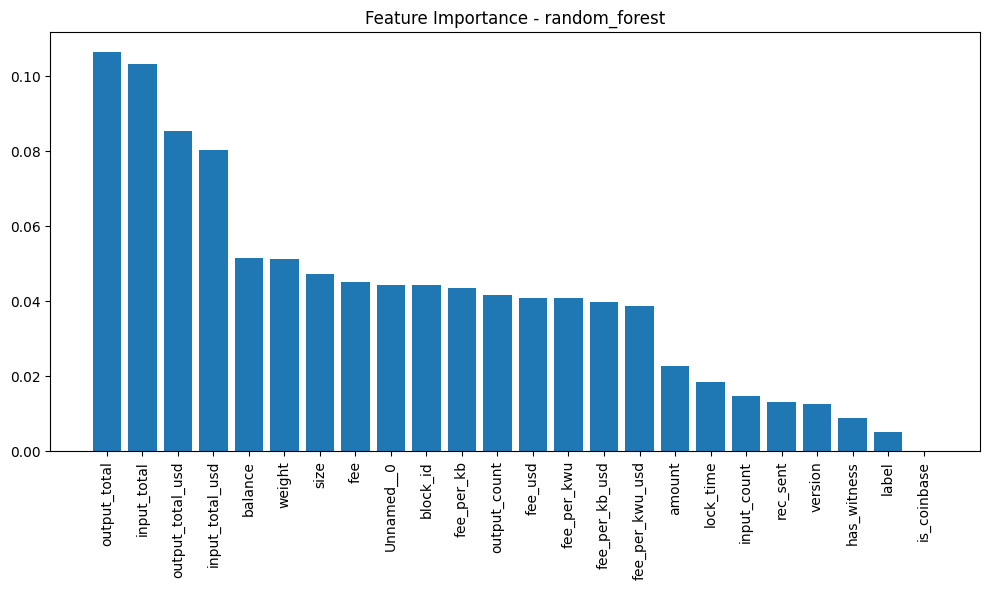

C:\Users\ykuma\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:06:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


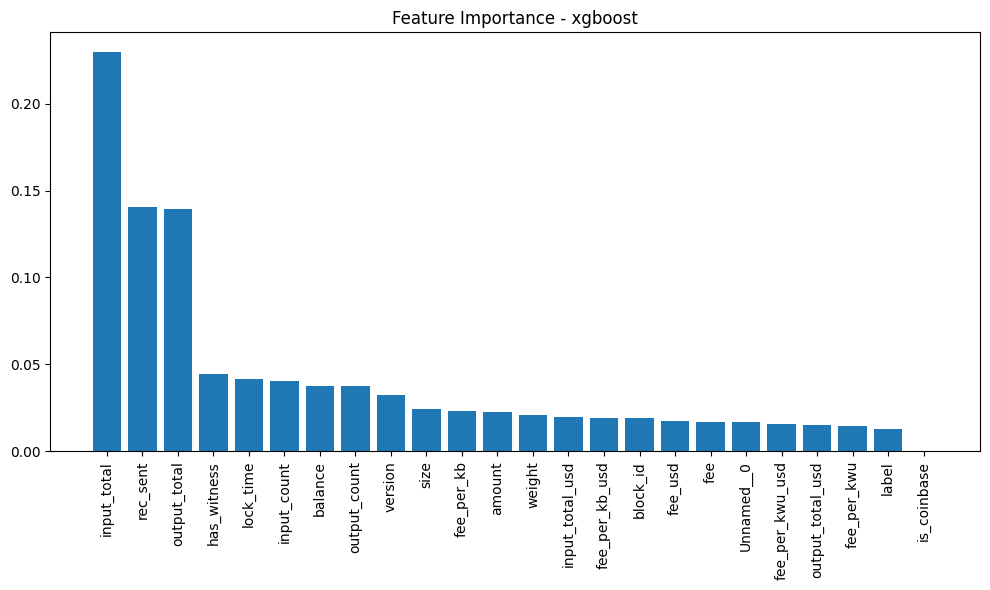

In [10]:
def plot_feature_importance(model, X_train, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X_train.columns

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importance - {model_name}")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Fit and plot for each base model
for name, model in base_models:
    model.fit(X_train, y_train)
    plot_feature_importance(model, X_train, name)


2. SHAP Analysis

In [ ]:
!pip uninstall shap -y
!pip cache purge
!pip install shap --upgrade --force-reinstall


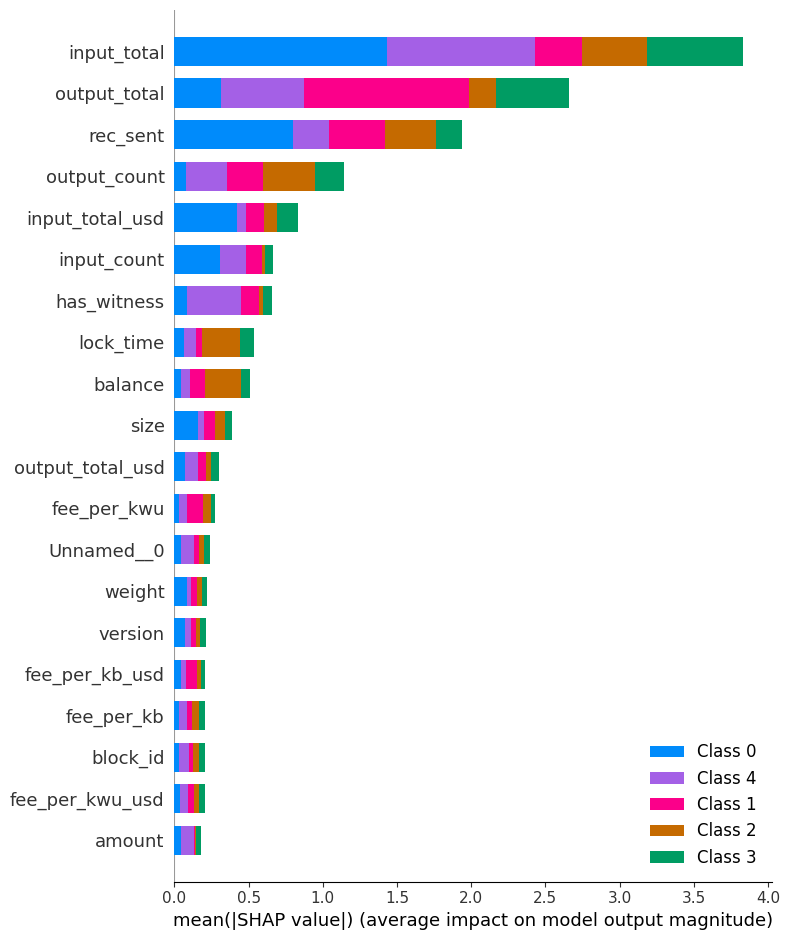

In [11]:
import shap

# Use SHAP for the fitted LightGBM model
lgb_model = base_models[0][1]
explainer = shap.Explainer(lgb_model)
shap_values = explainer(X_train)

# Summary plot
shap.summary_plot(shap_values, X_train)


3. Check for Underfitting or Overfitting

In [12]:
train_preds = stacked_model.predict(X_train)
test_preds = stacked_pred

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))

if accuracy_score(y_train, train_preds) - accuracy_score(y_test, test_preds) > 0.1:
    print("⚠️ Possible overfitting detected.")
elif accuracy_score(y_train, train_preds) < 0.7:
    print("⚠️ Possible underfitting detected.")
else:
    print("✅ Model generalization looks okay.")


Train Accuracy: 0.9999707687810582
Test Accuracy: 0.911756796258404
✅ Model generalization looks okay.


4. Learning Curve

[learning_curve] Training set sizes: [1500 3249 5000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   56.4s finished


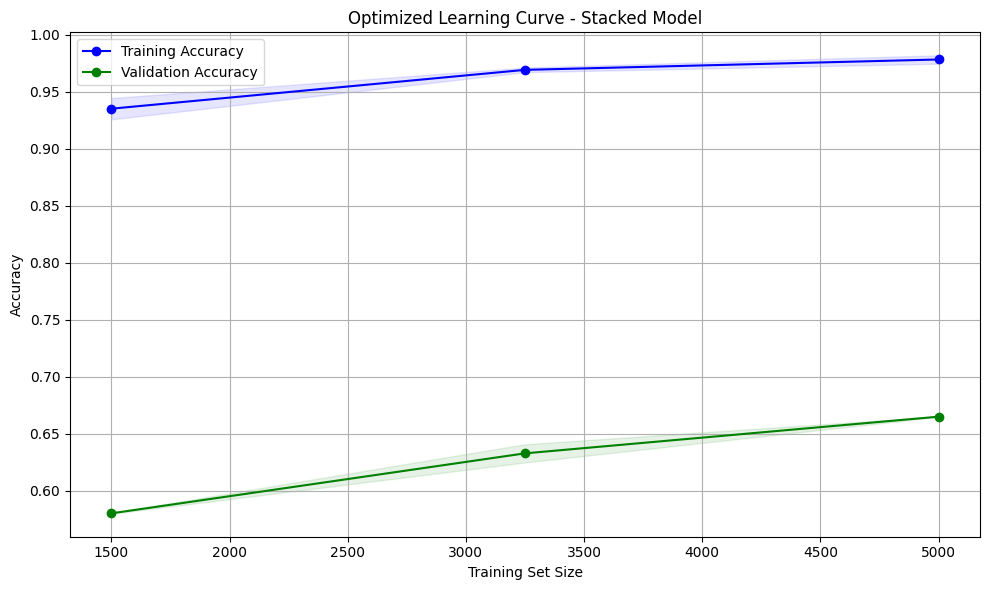

Completed in 56.86 seconds


In [16]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# Use a subsample only if needed (optional)
X_sample = X_train[:10000]
y_sample = y_train[:10000]

# Start timing
start = time.time()

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=stacked_model,
    X=X_sample,
    y=y_sample,
    train_sizes=np.linspace(0.3, 1.0, 3),  # fewer training sizes
    cv=2,                                  # reduce folds to 2
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    verbose=1
)

# Compute means and stds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title("Optimized Learning Curve - Stacked Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Completed in {time.time() - start:.2f} seconds")




5. Cross-Validation Score

In [17]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4838
[LightGBM] [Info] Number of data points in the train set: 273680, number of used features: 24
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


KeyboardInterrupt: 

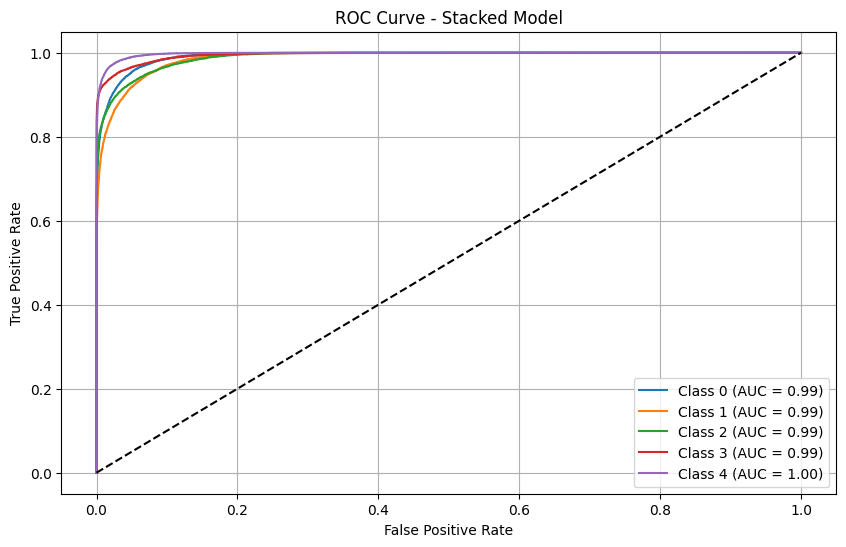

In [19]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Predict probabilities from stacked model directly
y_score = stacked_model.predict_proba(X_test)

# Plot ROC for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Stacked Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

